# Firefly Peak Mating Season

Emily Feuss<br>
April 14th, 2024

## Attempting to find any weather correlations with the predicted or actual peak firefly mating dates. Using exploratory data analysis to determine what weather patterns to focus on.

Using climate data from NOAA obtained from the climate data online search (https://www.ncdc.noaa.gov/cdo-web/search) centered around the weather center in Morristown, TN. Includues other related cities, all about 1.5 miles north, northeast, or northwest from the Elkmont area of the Great Smoky Mountain National Park where the synchronous fireflies put on their annual mating lightshow.

### References for these notes
- Great Smoky Mountain National Park (GSMNP) spans Tennessee and North Carolina
- Elkmont is a campground/area within GSMNP where the firefly display is most concentrated

In [26]:
import pandas as pd
daily_summaries = pd.read_csv('Daily Summaries.csv')

In [27]:
daily_summaries.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,...,TMIN,TOBS,WESD,WESF,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-01,NaN,NaN,0.00,0.0,...,28.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-02,NaN,NaN,0.00,0.0,...,38.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-03,NaN,NaN,0.62,0.0,...,40.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-04,NaN,NaN,0.13,0.0,...,45.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-05,NaN,NaN,0.00,0.0,...,40.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
daily_summaries['NAME'].value_counts()

NAME
MORRISTOWN RADIO WCRK, TN US                 11499
MORRISTOWN WEATHER FORECAST OFFICE, TN US    10472
HAMBLEN CO HQ TENNESSEE, TN US                6953
JEFFERSON CITY, TN US                         6510
WHITE PINE 2.0 NE, TN US                      5854
BULLS GAP 3.6 W, TN US                        5567
JEFFERSON CITY 2.1 NE, TN US                  4545
MOSHEIM 7.5 WSW, TN US                        4346
MORRISTOWN 5.3 W, TN US                       4307
JEFFERSON CITY 0.9 SE, TN US                  2135
JEFFERSON CO TOWER TENNESSEE, TN US           1833
RUTLEDGE 5.3 SE, TN US                        1604
BULLS GAP 0.9 SSW, TN US                      1294
BEAN STATION 3 NW, TN US                      1156
RUTLEDGE 2.0 SW, TN US                        1080
NEWPORT 4.0 NNW, TN US                         809
MORRISTOWN 5.9 WSW, TN US                      772
Name: count, dtype: int64

First thing I want to take a look at is how many different weather stations I am getting data from and how much data is coming from each station. From my understanding, Morristown TN is the biggest local weather station in the area, so it makes sense that a lot of the data is coming from there. I then used this list to map out the other towns and found them all similarly distanced from the Elkmont area.

### Renaming Columns

In [29]:
# let's look at column names and rename as necessary
daily_summaries.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'WESD',
       'WESF', 'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11'],
      dtype='object')

In [37]:
# rename df columns based on documentation from noaa
ds = daily_summaries.rename(columns={"WT01": "FOG", "WT03": "THUNDER","WT04": "ICE",
                                     "WT05":"HAIL", "WT06":"GLAZE","WT11":"WIND"})


- **FOG** (WT01): Fog, ice fog, or freezing fog (may include heavy fog)
- **ICE** (WT04):Ice pellets, sleet, snow pellets, or small hail
- **GLAZE** (WT06): Glaze or rime (thick ice coating the exterior of an object)
- **WIND** (WT11): High or damaging winds

In [38]:
# rename df columns based on documentation from noaa
ds = ds.rename(columns={"TOBS": "T_OBS", "WESD": "SNOW_WATER_GROUND","WESF": "SNOW_WATER_FALL"})

- **T_OBS**: Temperature at the time of observation
- **SNOW_WATER_GROUND** (WESD): Water equivalent of snow on the ground
- **SNOW_WATER_FALL** (WESF): Water equivalent of snowfall

## Column Guide
Some columns made sense to keep as they were originally named, but a guide will help with this
- MDPR - Multiday precipitation total (use with DAPR and DWPR, if available)
- DAPR - Number of days included in the multiday precipitation total (MDPR)

In [78]:
ds.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'T_OBS',
       'SNOW_WATER_GROUND', 'SNOW_WATER_FALL', 'FOG', 'THUNDER', 'ICE', 'HAIL',
       'GLAZE', 'WIND', 'DAY', 'MONTH', 'YEAR'],
      dtype='object')

In [39]:
ds.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,...,TMIN,T_OBS,SNOW_WATER_GROUND,SNOW_WATER_FALL,FOG,THUNDER,ICE,HAIL,GLAZE,WIND
0,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-01,NaN,NaN,0.00,0.0,...,28.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-02,NaN,NaN,0.00,0.0,...,38.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-03,NaN,NaN,0.62,0.0,...,40.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-04,NaN,NaN,0.13,0.0,...,45.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-05,NaN,NaN,0.00,0.0,...,40.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
ds.shape

(70736, 23)

In [45]:
ds.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,T_OBS,SNOW_WATER_GROUND,SNOW_WATER_FALL,FOG,THUNDER,ICE,HAIL,GLAZE,WIND
count,70736.000000,70736.000000,70736.000000,396.000000,399.000000,61338.000000,47909.000000,29055.000000,8786.000000,37904.000000,37965.000000,29063.000000,439.000000,462.000000,562.0,817.0,35.0,34.0,19.0,18.0
mean,36.183999,-83.335823,382.083159,3.361111,0.554211,0.137174,0.023052,0.040513,57.928523,68.455361,47.823864,54.618450,0.096583,0.089827,1.0,1.0,1.0,1.0,1.0,1.0
std,0.060136,0.122162,33.701897,2.851320,0.801661,0.334886,0.266082,0.360650,15.788980,16.799928,15.939571,16.953255,0.258220,0.253146,0.0,0.0,0.0,0.0,0.0,0.0
min,36.010556,-83.552944,330.700000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,-14.000000,-4.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
25%,36.138723,-83.447700,363.900000,2.000000,0.000000,0.000000,0.000000,0.000000,45.000000,56.000000,35.000000,42.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
50%,36.168200,-83.332500,377.600000,2.000000,0.230000,0.000000,0.000000,0.000000,60.000000,71.000000,49.000000,56.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
75%,36.206700,-83.269390,402.300000,3.000000,0.785000,0.090000,0.000000,0.000000,72.000000,83.000000,62.000000,68.000000,0.100000,0.100000,1.0,1.0,1.0,1.0,1.0,1.0
max,36.356670,-83.074501,533.400000,30.000000,4.500000,7.350000,16.500000,12.000000,87.000000,121.000000,89.000000,95.000000,3.900000,3.900000,1.0,1.0,1.0,1.0,1.0,1.0


### Need to separate the DATE column into YEAR - MONTH - DAY

In [48]:
ds['DATE'] = pd.to_datetime(ds['DATE'])

ds['DAY'] = ds['DATE'].dt.day
ds['MONTH'] = ds['DATE'].dt.month
ds['YEAR'] = ds['DATE'].dt.year

In [49]:
ds.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,...,SNOW_WATER_FALL,FOG,THUNDER,ICE,HAIL,GLAZE,WIND,DAY,MONTH,YEAR
0,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-01,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1992
1,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-02,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1992
2,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-03,NaN,NaN,0.62,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1992
3,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-04,NaN,NaN,0.13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,1992
4,USC00404613,"JEFFERSON CITY, TN US",36.12222,-83.47389,337.7,1992-01-05,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,1992


In [51]:
# let's check some NaNs
SNOW_NaN = ds['SNOW'].isna().sum()
SNOW_NaN

22827

In [65]:
# snow is a reasonable place to check by year, month
# let's see how much snow we're showing in January of 1994

ds_jan94 = ds.query('YEAR == 1994')
ds_jan94 = ds_jan94.query('MONTH == 1')

In [69]:
ds_jan94['SNOW'].describe()

count    59.000000
mean      0.127119
std       0.647230
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.000000
Name: SNOW, dtype: float64

Okay, so now I know how to play around and explore by year, month, and weather event. Next big step is importing a csv of firefly data.

---

## Importing firefly mating data

I compiled this data myself, from a mix of National Park Service (NPS) data regarding firefly lottery viewing dates and a paper studying predicting mating dates that shows peak mating dates. Between these two pieces of data, I have firefly dates from **1993 - 2005 & 2014 - 2023**. The event in 2020 was canceled due to COVID-19, but a surmised date range was calculated based on virtual events surrounding the annual show.

The imported data is START and END dates. This is based off the dates the NPS provided. This was related to the above paper by considering GOOD to be the START and PEAK + 1 day to be the END. "Good displays occur when at least 50% of males have emerged." [1] I chose PEAK + 1 day to match with NPS END dates because I assume the lightshow will still be desirable to watch as the peak tapers out.

(Because peak nights can span 2 - 5 days depending on weather conditions, only the final night of maximum
male display was recorded for this study (this date was referred to as “peak display”). [1] but I wanted to try to align this a bit with the extended windows of NPS dates offered to guests).

The year 1999 had a very short window of GOOD to PEAK, so I'm going to definitely explore this with the weather data.

In [75]:
fireflies = pd.read_csv('Firefly Dates.csv')

In [80]:
fireflies.describe()

,YEAR,START_MONTH,START_DAY,END_MONTH,END_DAY,LENGTH
count,23.000000,23.000000,23.000000,23.0,23.000000,23.000000
mean,2007.478261,5.695652,12.739130,6.0,10.478261,8.173913
std,10.474513,0.470472,12.027308,0.0,4.727767,2.103075
min,1993.000000,5.000000,1.000000,6.0,4.000000,4.000000
25%,1998.500000,5.000000,3.500000,6.0,7.000000,7.000000
50%,2004.000000,6.000000,7.000000,6.0,10.000000,8.000000
75%,2017.500000,6.000000,29.000000,6.0,13.500000,9.500000
max,2023.000000,6.000000,31.000000,6.0,22.000000,13.000000


From this we can see that the END date is alway in June. Perhaps we should also remake this data in Day of Year count...just to see.

In [76]:
fireflies['START_MONTH'].dtype

dtype('int64')

In [81]:
firefly = pd.read_csv('Firefly Dates 2.csv')

In [82]:
firefly.describe()

,YEAR,START_MONTH,START_DAY,END_MONTH,END_DAY,LENGTH,START_DOY,END_DOY
count,23.000000,23.000000,23.000000,23.0,23.000000,23.000000,23.000000,23.000000
mean,2007.478261,5.695652,12.739130,6.0,10.478261,8.173913,154.565217,161.826087
std,10.474513,0.470472,12.027308,0.0,4.727767,2.103075,4.009376,4.529220
min,1993.000000,5.000000,1.000000,6.0,4.000000,4.000000,148.000000,155.000000
25%,1998.500000,5.000000,3.500000,6.0,7.000000,7.000000,152.000000,158.500000
50%,2004.000000,6.000000,7.000000,6.0,10.000000,8.000000,154.000000,161.000000
75%,2017.500000,6.000000,29.000000,6.0,13.500000,9.500000,157.500000,164.500000
max,2023.000000,6.000000,31.000000,6.0,22.000000,13.000000,163.000000,173.000000


So our average start date is day 154 +- 4 (around June 2nd). Our average end date is 162 +- 4 days (around June 10th). Looking at our min & max numbers of START and END, we can see that there are some years where the END date is earlier than another year's START date, which I think is interesting and and shows there is some variety or possible outliers to our dates.

In [83]:
import matplotlib.pyplot as plt

#### Want to take a quick look at our firefly dates to see what the distribution looks like. 

{'whiskers': [<matplotlib.lines.Line2D at 0x15fc0fe10>,
 'caps': [<matplotlib.lines.Line2D at 0x168288f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x16808a8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1682cf910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1682bb710>],
 'means': []}

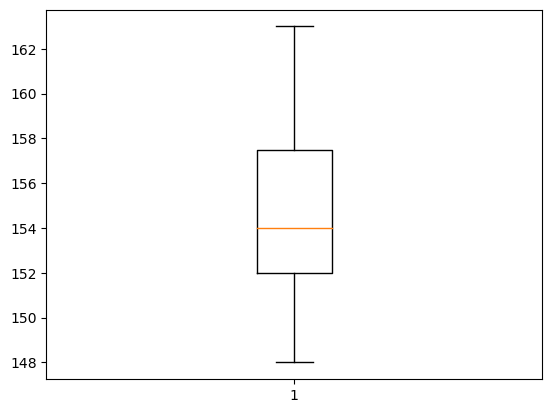

In [84]:
plt.boxplot(firefly['START_DOY'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16838e3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16838fc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x16838d6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1683991d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16838f790>],
 'means': []}

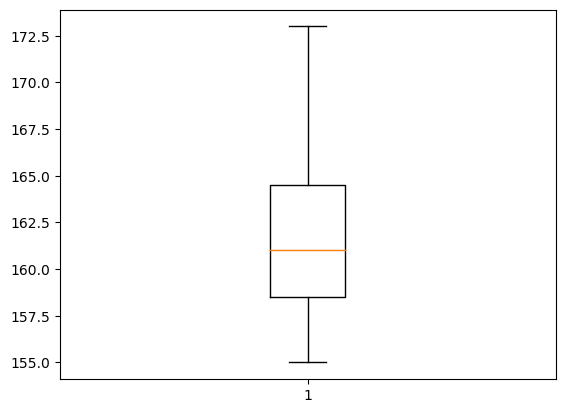

In [85]:
plt.boxplot(firefly['END_DOY'])

### Notes during EDA to help determine final research questions

**WORKS CITED**<br>
[1] Lynn F. Faust, Paul A. Weston, Degree-Day Prediction of Adult Emergence of Photinus carolinus (Coleoptera: Lampyridae), Environmental Entomology, Volume 38, Issue 5, 1 October 2009, Pages 1505–1512, https://doi.org/10.1603/022.038.0519

[2] Degree Days https://www.eia.gov/energyexplained/units-and-calculators/degree-days.php

**NOTES from Citation [1]**
- fireflies pupate in the soil in April/May
- Elkmont has a near-temperate rain forest habitat with rainfall averaging 168 cm/yr
- males do not fly in temperatures 50F (10C) (L.F.F., personal observation) or under heavy rainfall, yet emerge rapidly in unusually warm periods
- Degree Day base: Starting dates of 1 January, 1 March, and 1 May were compared for each growing season, as were base temperatures of 40, 45, and 50F (4, 7, and 10C) for the max/min method

# Final Research Questions After EDA
1. How much snowfall was there November 1998 - April 1999 that might have caused the short 1999 season?
    - Let's compare vs. snowfall November 2002 - April 2003 to look at longest season
    - Will compare by each month and then total "winter season"<br><br>
2. Our latest "start date" is June 11th in 1993. Let's look at spring rainfall and see if this causes an impact
    - Let's compare vs. spring rainfall in 2003, our earliest date at May 28th
    - We may also want to consider water equivalent of snowfalls in March<br><br>
3. Current firefly peak date estimations use degree days, which is a comparsion of the measurement vs. the average set point for that location. Degree Day base starting March 1 is 45F. How many days in April were above 45F for each year? Does this correlate at all with START date?<br><br>
4. The short season of 1999 and the long season of 2003:
    - What was the rainfall in May & June these years?
    - What was the daily average temperature?
    - Anything to explain the difference in length?<br><br>
5. I'm interested in our latest END dates, at June 22 1997 (also let's look at June 20, 1993) - could weather in June be related to this? Degree Day base for June is 50F, or let's also consider daily or monthly rainfall.